# Programming Exercise 1: Linear Regression

## Introduction

In this exercise, you will implement linear regression and get to see it work on data. We will be using [`numpy`](http://www.numpy.org/) for all arrays and matrix operations, and [`matplotlib`](https://matplotlib.org/) for plotting.



In [1]:
pwd

'C:\\Users\\Owner'

In [375]:
# used for manipulating directory paths
import os
import seaborn as sns
# Scientific and vector computation for python
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Plotting library
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces
# tells matplotlib to embed plots within the notebook
%matplotlib inline

In [376]:
#Applying Model selection technique
data = pd.read_csv(r'D:\Sem10\Machine Learning\house_prices_data_training_data.csv')

data.shape


(17999, 21)

In [377]:
data=data.drop(columns =['id','date']) #remove the id and date columns as they are considered redundant
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


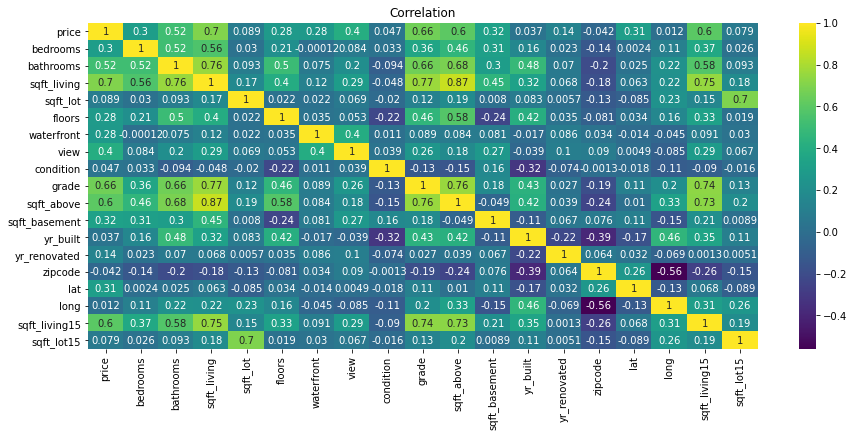

In [389]:
plt.figure(figsize=(15,6))  #choosing features with best correlation with the price for feature reduction
plt.title('Correlation')
sns.heatmap(data.corr(),annot=True,cmap='viridis',linecolor='white')
plt.show()

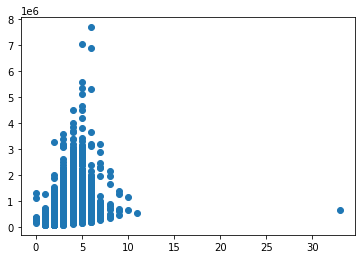

In [379]:
plt.scatter(data["bedrooms"], data["price"])  #some plots of what i considered affecting the house price
plt.show()

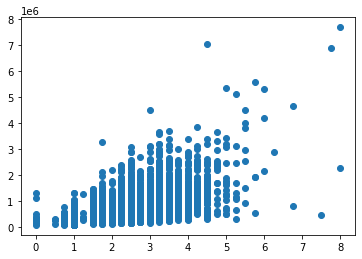

In [380]:
plt.scatter(data["bathrooms"], data["price"])
plt.show()

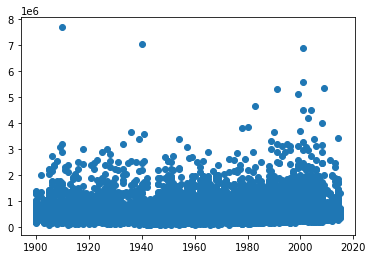

In [381]:
plt.scatter(data["yr_built"], data["price"]) #some plots of what i considered affecting the house price
plt.show()

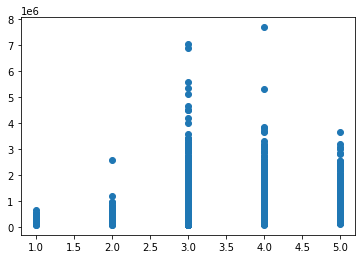

In [382]:
plt.scatter(data["condition"], data["price"]) #some plots of what i considered affecting the house price
plt.show()

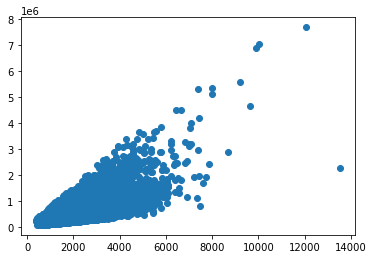

In [383]:
plt.scatter(data["sqft_living"], data["price"]) #some plots of what i considered affecting the house price
plt.show()

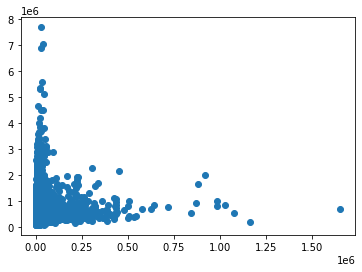

In [384]:
plt.scatter(data["sqft_lot"], data["price"]) #some plots of what i considered affecting the house price
plt.show()


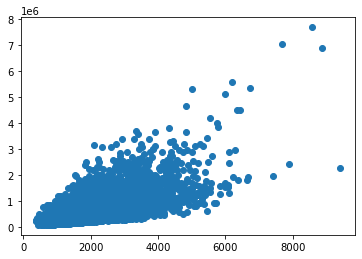

In [385]:
plt.scatter(data["sqft_above"], data["price"]) #some plots of what i considered affecting the house price
plt.show()

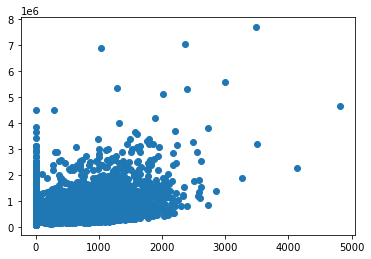

In [386]:
plt.scatter(data["sqft_basement"], data["price"]) #some plots of what i considered affecting the house price
plt.show()

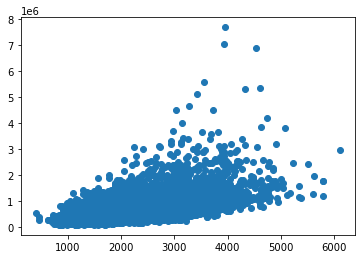

In [387]:
plt.scatter(data["sqft_living15"], data["price"]) #some plots of what i considered affecting the house price
plt.show()

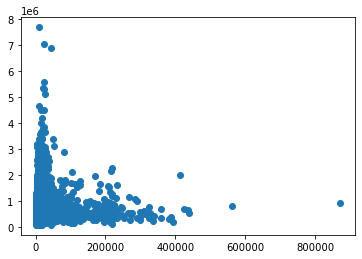

In [388]:
plt.scatter(data["sqft_lot15"], data["price"]) #some plots of what i considered affecting the house price
plt.show()

In [390]:
data=data.drop(columns =['bedrooms','sqft_lot','floors','waterfront','view','condition','sqft_basement','yr_built','yr_renovated','zipcode','lat','long','sqft_lot15']) 
#remove redundant features with low correlation
data.head()

,price,bathrooms,sqft_living,grade,sqft_above,sqft_living15
0,221900.0,1.00,1180,7,1180,1340
1,538000.0,2.25,2570,7,2170,1690
2,180000.0,1.00,770,6,770,2720
3,604000.0,3.00,1960,7,1050,1360
4,510000.0,2.00,1680,8,1680,1800


Now run the defined function with the loaded data to visualize the data. The end result should look like the following figure:

![](Figures/dataset1.png)

Execute the next cell to visualize the data.

To quickly learn more about the `matplotlib` plot function and what arguments you can provide to it, you can type `?pyplot.plot` in a cell within the jupyter notebook. This opens a separate page showing the documentation for the requested function. You can also search online for plotting documentation. 

To set the markers to red circles, we used the option `'or'` within the `plot` function.

In [43]:
?pyplot.plot

In [6]:
# X.shape

Once you have completed the function, the next step will run `computeCost` two times using two different initializations of $\theta$. You will see the cost printed to the screen.

After you are finished call the implemented `gradientDescent` function and print the computed $\theta$. We initialize the $\theta$ parameters to 0 and the learning rate $\alpha$ to 0.01. Execute the following cell to check your code.

We will use your final parameters to plot the linear fit. The results should look like the following figure.

![](Figures/regression_result.png)



If you have successfully completed the material above, congratulations! You now understand linear regression and should able to start using it on your own datasets.

For the rest of this programming exercise, we have included the following optional exercises. These exercises will help you gain a deeper understanding of the material, and if you are able to do so, we encourage you to complete them as well. You can still submit your solutions to these exercises to check if your answers are correct.

## 3 Linear regression with multiple variables

In this part, you will implement linear regression with multiple variables to predict the prices of houses. Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices.

The file `Data/ex1data2.txt` contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price
of the house. 

<a id="section4"></a>
### 3.1 Feature Normalization

We start by loading and displaying some values from this dataset. By looking at the values, note that house sizes are about 1000 times the number of bedrooms. When features differ by orders of magnitude, first performing feature scaling can make gradient descent converge much more quickly.

In [391]:
data.head() #same data set used in 1
data.shape


(17999, 6)

In [392]:
#split data into 60% training, 20% CV, 20% testing
def data_split(df, train_percent=.6, validate_percent=.2, seed=None):
    np.random.seed(seed)
    perm = np.random.permutation(df.index)
    m = len(df.index)
    train_end = int(train_percent * m)
    validate_end = int(validate_percent * m) + train_end
    train = df.iloc[perm[:train_end]]
    validate = df.iloc[perm[train_end:validate_end]]
    test = df.iloc[perm[validate_end:]]
    return train, validate, test
 

   

In [393]:
training, cv, testing = data_split(data,0.6,0.2,None)
training.shape

(10799, 6)

Your task here is to complete the code in `featureNormalize` function:
- Subtract the mean value of each feature from the dataset.
- After subtracting the mean, additionally scale (divide) the feature values by their respective “standard deviations.”

The standard deviation is a way of measuring how much variation there is in the range of values of a particular feature (most data points will lie within ±2 standard deviations of the mean); this is an alternative to taking the range of values (max-min). In `numpy`, you can use the `std` function to compute the standard deviation. 

For example, the quantity `X[:, 0]` contains all the values of $x_1$ (house sizes) in the training set, so `np.std(X[:, 0])` computes the standard deviation of the house sizes.
At the time that the function `featureNormalize` is called, the extra column of 1’s corresponding to $x_0 = 1$ has not yet been added to $X$. 

You will do this for all the features and your code should work with datasets of all sizes (any number of features / examples). Note that each column of the matrix $X$ corresponds to one feature.

<div class="alert alert-block alert-warning">
**Implementation Note:** When normalizing the features, it is important
to store the values used for normalization - the mean value and the standard deviation used for the computations. After learning the parameters
from the model, we often want to predict the prices of houses we have not
seen before. Given a new x value (living room area and number of bedrooms), we must first normalize x using the mean and standard deviation that we had previously computed from the training set.
</div>
<a id="featureNormalize"></a>

In [394]:
def  featureNormalize(X):
    """
    Normalizes the features in X. returns a normalized version of X where
    the mean value of each feature is 0 and the standard deviation
    is 1. This is often a good preprocessing step to do when working with
    learning algorithms.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n).
    
    Returns
    -------
    X_norm : array_like
        The normalized dataset of shape (m x n).
    
    Instructions
    ------------
    First, for each feature dimension, compute the mean of the feature
    and subtract it from the dataset, storing the mean value in mu. 
    Next, compute the  standard deviation of each feature and divide
    each feature by it's standard deviation, storing the standard deviation 
    in sigma. 
    
    Note that X is a matrix where each column is a feature and each row is
    an example. You needto perform the normalization separately for each feature. 
    
    Hint
    ----
    You might find the 'np.mean' and 'np.std' functions useful.
    """
    # You need to set these values correctly
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    # =========================== YOUR CODE HERE =====================
    
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma
    # ================================================================
    return X_norm, mu, sigma

Execute the next cell to run the implemented `featureNormalize` function.

In [130]:
?np.std

In [395]:
X_norm_training, mu_training, sigma_training = featureNormalize(training)
X_norm_training.head()


,price,bathrooms,sqft_living,grade,sqft_above,sqft_living15
7312,0.058293,0.247942,-0.373134,-0.506423,-1.105252,-0.379137
16759,-0.043170,0.904118,0.428634,0.347153,-0.385704,0.080781
5271,0.339373,0.247942,0.517719,1.200728,0.954146,1.294374
12486,-0.831564,0.247942,-0.406541,-0.506423,-0.733072,-0.423646
13008,-0.723246,0.576030,-0.785153,-0.506423,-0.832320,-1.002253


In [396]:
X_norm_cv, mu_cv, sigma_cv = featureNormalize(cv)
X_norm_cv.head()

,price,bathrooms,sqft_living,grade,sqft_above,sqft_living15
16078,0.546750,0.574927,1.606620,1.212135,2.174785,1.308182
653,0.169637,-0.087841,0.111663,-0.512163,-0.473274,-0.045629
8822,-0.494799,-1.413379,-1.316356,-0.512163,-1.113326,-1.548211
4408,3.243174,1.237696,0.490980,2.074285,0.919781,0.906502
11987,-0.472697,0.574927,0.468667,0.349986,0.894681,0.638715


In [397]:
X_norm_testing, mu_testing, sigma_testing = featureNormalize(testing)
X_norm_testing.head()

,price,bathrooms,sqft_living,grade,sqft_above,sqft_living15
7431,0.128287,-1.406501,-0.329372,-0.501303,0.001347,-0.713087
2288,-0.029914,-0.409949,-0.502747,-0.501303,-0.195734,-0.311022
15017,0.237579,-0.409949,-0.405224,-0.501303,-0.922473,0.254847
621,0.133751,0.586603,0.017378,-0.501303,-0.503674,-0.072761
7912,-0.254236,0.254419,-0.286028,-0.501303,0.050618,-0.445044


After the `featureNormalize` function is tested, we now add the intercept term to `X_norm`:

In [398]:
Training = pd.DataFrame(np.concatenate([np.ones((training.shape[0], 1)), X_norm_training], axis=1))
CV = pd.DataFrame(np.concatenate([np.ones((cv.shape[0], 1)), X_norm_cv], axis=1))
Testing = pd.DataFrame(np.concatenate([np.ones((testing.shape[0], 1)), X_norm_testing], axis=1))
Testing.head() #concatenate 1s to represent x0, testing data as an example first column all ones

,0,1,2,3,4,5,6
0,1.0,0.128287,-1.406501,-0.329372,-0.501303,0.001347,-0.713087
1,1.0,-0.029914,-0.409949,-0.502747,-0.501303,-0.195734,-0.311022
2,1.0,0.237579,-0.409949,-0.405224,-0.501303,-0.922473,0.254847
3,1.0,0.133751,0.586603,0.017378,-0.501303,-0.503674,-0.072761
4,1.0,-0.254236,0.254419,-0.286028,-0.501303,0.050618,-0.445044


<a id="section5"></a>
### 3.2 Gradient Descent

Previously, you implemented gradient descent on a univariate regression problem. The only difference now is that there is one more feature in the matrix $X$. The hypothesis function and the batch gradient descent update
rule remain unchanged. 

You should complete the code for the functions `computeCostMulti` and `gradientDescentMulti` to implement the cost function and gradient descent for linear regression with multiple variables. If your code in the previous part (single variable) already supports multiple variables, you can use it here too.
Make sure your code supports any number of features and is well-vectorized.
You can use the `shape` property of `numpy` arrays to find out how many features are present in the dataset.

<div class="alert alert-block alert-warning">
**Implementation Note:** In the multivariate case, the cost function can
also be written in the following vectorized form:

$$ J(\theta) = \frac{1}{2m}(X\theta - \vec{y})^T(X\theta - \vec{y}) $$

where 

$$ X = \begin{pmatrix}
          - (x^{(1)})^T - \\
          - (x^{(2)})^T - \\
          \vdots \\
          - (x^{(m)})^T - \\ \\
        \end{pmatrix} \qquad \mathbf{y} = \begin{bmatrix} y^{(1)} \\ y^{(2)} \\ \vdots \\ y^{(m)} \\\end{bmatrix}$$

the vectorized version is efficient when you are working with numerical computing tools like `numpy`. If you are an expert with matrix operations, you can prove to yourself that the two forms are equivalent.
</div>

<a id="computeCostMulti"></a>

In [399]:
def computeCostMulti(X, y, theta):
    """
    Compute cost for linear regression with multiple variables.
    Computes the cost of using theta as the parameter for linear regression to fit the data points in X and y.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n+1).
    
    y : array_like
        A vector of shape (m, ) for the values at a given data point.
    
    theta : array_like
        The linear regression parameters. A vector of shape (n+1, )
    
    Returns
    -------
    J : float
        The value of the cost function. 
    
    Instructions
    ------------
    Compute the cost of a particular choice of theta. You should set J to the cost.
    """
    # Initialize some useful values
    m = y.shape[0] # number of training examples
    
    # You need to return the following variable correctly
    J = 0
    
    # ======================= YOUR CODE HERE ===========================
    
    h = np.dot(X, theta)
    
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    
    # ==================================================================
    return J


In [400]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    """
    Performs gradient descent to learn theta.
    Updates theta by taking num_iters gradient steps with learning rate alpha.
        
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n+1).
    
    y : array_like
        A vector of shape (m, ) for the values at a given data point.
    
    theta : array_like
        The linear regression parameters. A vector of shape (n+1, )
    
    alpha : float
        The learning rate for gradient descent. 
    
    num_iters : int
        The number of iterations to run gradient descent. 
    
    Returns
    -------
    theta : array_like
        The learned linear regression parameters. A vector of shape (n+1, ).
    
    J_history : list
        A python list for the values of the cost function after each iteration.
    
    Instructions
    ------------
    Peform a single gradient step on the parameter vector theta.

    While debugging, it can be useful to print out the values of 
    the cost function (computeCost) and gradient here.
    """
    # Initialize some useful values
    m = y.shape[0] # number of training examples
    
    # make a copy of theta, which will be updated by gradient descent
    theta = theta.copy()
    
    J_history = []
    
    for i in range(num_iters):
        # ======================= YOUR CODE HERE ==========================
        hypothesis=0
        
        
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        
        # =================================================================
        
        # save the cost J in every iteration
        J_history.append(computeCostMulti(X, y, theta))
    
    return theta, J_history

In [401]:
#Training phase

alpha = 0.1
num_iters = 400
Training_temp = Training
Price = Training_temp.iloc[:,1]
Training_temp=Training_temp.drop(columns =[1])


theta_d1 = np.zeros(2) #degree 1 
theta_converge1, J_train1 = gradientDescentMulti(Training_temp.iloc[:,0:2], Price, theta_d1, alpha, num_iters)
print(J_train1[num_iters-1])

0.3647347437019879


In [402]:
theta_d2 = np.zeros(3) #degree 2
theta_converge2, J_train2 = gradientDescentMulti(Training_temp.iloc[:,0:3], Price, theta_d2, alpha, num_iters)
print(J_train2[num_iters-1])

0.25404865781281905


In [403]:
theta_d3 = np.zeros(4) #degree 3
theta_converge3, J_train3 = gradientDescentMulti(Training_temp.iloc[:,0:4], Price, theta_d3, alpha, num_iters)
print(J_train3[num_iters-1])

0.2354020954892366


In [404]:
theta_d4 = np.zeros(5) #degree 4
theta_converge4, J_train4 = gradientDescentMulti(Training_temp.iloc[:,0:5], Price, theta_d4, alpha, num_iters)
print(J_train4[num_iters-1])

0.23352572305015207


In [405]:
theta_d5 = np.zeros(6) #degree 5
theta_converge5, J_train5 = gradientDescentMulti(Training_temp.iloc[:,0:6], Price, theta_d5, alpha, num_iters)
print(J_train5[num_iters-1])

0.23247874230765692


In [406]:

#theta_d6 = np.zeros(7) #degree 6
#theta_converge6, J_train6 = gradientDescentMulti(Training_temp.iloc[:,0:7], Price, theta_d6, alpha, num_iters)
#print(J_train6[num_iters-1])

In [407]:
#theta_d7 = np.zeros(8) #degree 7
#theta_converge7, J_train7 = gradientDescentMulti(Training_temp.iloc[:,0:8], Price, theta_d7, alpha, num_iters)
#print(J_train7[num_iters-1])

In [408]:
#theta_d8 = np.zeros(9) #degree 8
#theta_converge8, J_train8 = gradientDescentMulti(Training_temp.iloc[:,0:9], Price, theta_d8, alpha, num_iters)
#print(J_train8[num_iters-1])

In [409]:
#theta_d9 = np.zeros(10) #degree 9
#theta_converge9, J_train9 = gradientDescentMulti(Training_temp.iloc[:,0:10], Price, theta_d9, alpha, num_iters)
#print(J_train9[num_iters-1])

In [410]:
#theta_d10 = np.zeros(11) #degree 10
#theta_converge10, J_train10 = gradientDescentMulti(Training_temp.iloc[:,0:11], Price, theta_d10, alpha, num_iters)
#print(J_train10[num_iters-1])

In [411]:
#theta_d11 = np.zeros(12) #degree 11
#theta_converge11, J_train11 = gradientDescentMulti(Training_temp.iloc[:,0:12], Price, theta_d11, alpha, num_iters)
#print(J_train11[num_iters-1])

In [412]:
#theta_d12 = np.zeros(13) #degree 12
#theta_converge12, J_train12 = gradientDescentMulti(Training_temp.iloc[:,0:13], Price, theta_d12, alpha, num_iters)
#print(J_train12[num_iters-1])

In [413]:
#theta_d13 = np.zeros(14) #degree 13
#theta_converge13, J_train13 = gradientDescentMulti(Training_temp.iloc[:,0:14], Price, theta_d13, alpha, num_iters)
#print(J_train13[num_iters-1])

In [414]:
#theta_d14 = np.zeros(15) #degree 14
#theta_converge14, J_train14 = gradientDescentMulti(Training_temp.iloc[:,0:15], Price, theta_d14, alpha, num_iters)
#print(J_train14[num_iters-1])

In [415]:
#theta_d15 = np.zeros(16) #degree 15
#theta_converge15, J_train15 = gradientDescentMulti(Training_temp.iloc[:,0:16], Price, theta_d15, alpha, num_iters)
#print(J_train15[num_iters-1])

In [416]:
#theta_d16 = np.zeros(17) #degree 16
#theta_converge16, J_train16 = gradientDescentMulti(Training_temp.iloc[:,0:17], Price, theta_d16, alpha, num_iters)
#print(J_train16[num_iters-1])

In [417]:
#theta_d17 = np.zeros(18) #degree 17
#theta_converge17, J_train17 = gradientDescentMulti(Training_temp.iloc[:,0:18], Price, theta_d17, alpha, num_iters)
#print(J_train17[num_iters-1])

In [418]:
#theta_d18 = np.zeros(19) #degree 18
#theta_converge18, J_train18 = gradientDescentMulti(Training_temp.iloc[:,0:19], Price, theta_d18, alpha, num_iters)
#print(J_train18[num_iters-1]) #it was found that using degree 18 had the least cost function value


In [419]:
print(theta_converge5) #from theta 0 until --> theta 18

0   -2.247464e-16
2   -7.970240e-02
3    5.865406e-01
4    3.091198e-01
5   -1.384443e-01
6    7.608638e-02
Name: 1, dtype: float64


In [420]:
#Cross_Validation using the thetas computed from the training phase
CV_temp = CV
Price = CV_temp.iloc[:,1]
CV_temp= CV_temp.drop(columns =[1])


In [421]:
J1= computeCostMulti(CV_temp.iloc[:,0:2], Price, theta_converge1)
print(J1)

0.35966928767167305


In [422]:
J2= computeCostMulti(CV_temp.iloc[:,0:3], Price, theta_converge2)
print(J2)

0.26046585729279836


In [423]:
J3= computeCostMulti(CV_temp.iloc[:,0:4], Price, theta_converge3)
print(J3)

0.23533961421168006


In [424]:
J4= computeCostMulti(CV_temp.iloc[:,0:5], Price, theta_converge4)
print(J4)

0.2311042737207658


In [425]:
J5= computeCostMulti(CV_temp.iloc[:,0:6], Price, theta_converge5) #J5 is the smallest cost value
print(J5)

0.22995553441512978


In [426]:
#J6= computeCostMulti(CV_temp.iloc[:,0:7], Price, theta_converge6)
#print(J6)

In [427]:
#J7= computeCostMulti(CV_temp.iloc[:,0:8], Price, theta_converge7)
#print(J7)

In [428]:
#J8= computeCostMulti(CV_temp.iloc[:,0:9], Price, theta_converge8)
#print(J8)

In [429]:
#J9= computeCostMulti(CV_temp.iloc[:,0:10], Price, theta_converge9)
#print(J9)

In [430]:
#J10= computeCostMulti(CV_temp.iloc[:,0:11], Price, theta_converge10)
#print(J10)

In [431]:
#J11= computeCostMulti(CV_temp.iloc[:,0:12], Price, theta_converge11)
#print(J11)

In [432]:
#J12= computeCostMulti(CV_temp.iloc[:,0:13], Price, theta_converge12)
#print(J12)

In [433]:
#J13= computeCostMulti(CV_temp.iloc[:,0:14], Price, theta_converge13)
#print(J13)

In [434]:
#J14= computeCostMulti(CV_temp.iloc[:,0:15], Price, theta_converge14)
#print(J14)

In [435]:
#J15= computeCostMulti(CV_temp.iloc[:,0:16], Price, theta_converge15)
#print(J15)

In [436]:
#J16= computeCostMulti(CV_temp.iloc[:,0:17], Price, theta_converge16)
#print(J16)

In [437]:
#J17= computeCostMulti(CV_temp.iloc[:,0:18], Price, theta_converge17)
#print(J17)

In [438]:
#J18= computeCostMulti(CV_temp.iloc[:,0:19], Price, theta_converge18)
#print(J18)

In [440]:
#Testing Phase
Testing_temp = Testing
Price = Testing_temp.iloc[:,1]
Testing_temp= Testing_temp.drop(columns =[1])

J_test= computeCostMulti(Testing_temp.iloc[:,0:6], Price, theta_converge5)
print(J_test)

0.22590417826714657


In [441]:

price_prediction = (price_prediction*sigma_testing['price'])+mu_testing['price']
print(price_prediction)

[9.20504657e+54 1.84760081e+55 6.63442707e+55 ... 7.89181946e+55
 8.65965639e+55 5.31794476e+55]


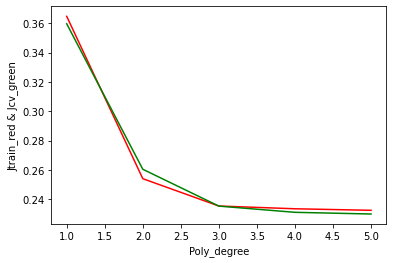

In [445]:
#Model_evaluation
#Plotting_Jtrain_&_Jcv_against_the_degree
Poly_degree = [1, 2, 3, 4, 5]
Jtrain_array = [J_train1[num_iters-1], J_train2[num_iters-1],J_train3[num_iters-1],J_train4[num_iters-1],J_train5[num_iters-1]]
Jcv_array = [J1, J2, J3, J4, J5]

plt.xlabel('Poly_degree')
plt.ylabel('Jtrain_red & Jcv_green')
plt.plot(Poly_degree,Jtrain_array , 'r') 
plt.plot(Poly_degree, Jcv_array, 'g') 

#as shown in the plot the best degree found was 5
plt.show()